<a href="https://colab.research.google.com/github/akeren/exams-anomalous-detection/blob/main/Exams_Anomalous_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Checking Hardware Accelerator  

In [1]:
!nvidia-smi

Sat Dec 28 05:05:59 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# Install Roboflow Python SDK to download a YOLOv11 dataset


In [2]:
# Install the Roboflow package
!pip install roboflow

# Import Roboflow and Google Colab userdata
from roboflow import Roboflow
from google.colab import userdata

# Fetch the API key securely
api_key = userdata.get('ROBO_FLOW_API_KEY')
if not api_key:
    raise ValueError('API key is missing. Ensure it is saved in Colab userdata.')

# Initialize Roboflow
rf = Roboflow(api_key=api_key)

# Access the workspace and project
workspace_name = 'kattal'
project_name = 'exam-cheating'
project = rf.workspace(workspace_name).project(project_name)

# Access the specific version and download
version_number = 2
version = project.version(version_number)

# Ensure the correct model framework
framework = "yolov11"
dataset = version.download(framework)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.6 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to exam-cheating-2 in yolov11:: 100%|██████████| 736/736 [00:00<00:00, 6514.57it/s]


# Install ultralytics

In [3]:
# Install ultralytices package
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 904.3/904.3 kB 15.3 MB/s eta 0:00:00


# Load the model

In [4]:
# Import YOLO
from ultralytics import YOLO

model = YOLO('yolo11n.pt')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.35M/5.35M [00:00<00:00, 67.2MB/s]


# Train the model

In [5]:
results = model.train(
    data='/content/exam-cheating-2/data.yaml',
    epochs=100,
    imgsz=640,
    batch=32,
    lr0=0.001,
    optimizer='AdamW',
    weight_decay=0.001,
    augment=True,
    val=True,
    patience=20
  )

Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/exam-cheating-2/data.yaml, epochs=100, time=None, patience=20, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sh

100%|██████████| 755k/755k [00:00<00:00, 14.8MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/exam-cheating-2/train/labels... 315 images, 0 backgrounds, 0 corrupt: 100%|██████████| 315/315 [00:00<00:00, 1678.67it/s]


train: New cache created: /content/exam-cheating-2/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.24 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/exam-cheating-2/valid/labels... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<00:00, 1200.71it/s]

val: New cache created: /content/exam-cheating-2/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.001), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      5.56G      2.244      3.297      1.862        787        640: 100%|██████████| 10/10 [00:07<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.36s/it]

                   all         30        204     0.0033      0.158    0.00207   0.000431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      5.17G      1.867      2.387      1.511        686        640: 100%|██████████| 10/10 [00:04<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.44s/it]

                   all         30        204   0.000407     0.0524   0.000476   7.42e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      5.75G      1.746      2.147      1.438        697        640: 100%|██████████| 10/10 [00:06<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.00it/s]

                   all         30        204     0.0781       0.47     0.0963     0.0269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100       5.6G      1.664      1.902      1.417        824        640: 100%|██████████| 10/10 [00:04<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.43it/s]

                   all         30        204     0.0373      0.821       0.24     0.0948



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      5.44G      1.619      1.755      1.412        795        640: 100%|██████████| 10/10 [00:05<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.22s/it]

                   all         30        204      0.495       0.42      0.313      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100       5.8G      1.583      1.688      1.403        771        640: 100%|██████████| 10/10 [00:04<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.42it/s]

                   all         30        204      0.771       0.19      0.458        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      5.72G      1.526      1.584      1.347        874        640: 100%|██████████| 10/10 [00:04<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.00s/it]

                   all         30        204       0.58      0.434      0.525      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      5.66G      1.476      1.544      1.337        596        640: 100%|██████████| 10/10 [00:05<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.60it/s]

                   all         30        204      0.522      0.518      0.522      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      5.34G      1.459      1.481      1.308        783        640: 100%|██████████| 10/10 [00:03<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.72it/s]

                   all         30        204      0.426       0.53      0.516       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      5.55G      1.474      1.455      1.318        869        640: 100%|██████████| 10/10 [00:05<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.22it/s]

                   all         30        204      0.545      0.661      0.657      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      5.31G      1.484      1.462      1.325        796        640: 100%|██████████| 10/10 [00:04<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]

                   all         30        204      0.594      0.624      0.671      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      5.45G      1.411      1.395      1.289        906        640: 100%|██████████| 10/10 [00:04<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.39it/s]

                   all         30        204      0.657      0.817      0.747      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      5.68G      1.419      1.409      1.293        589        640: 100%|██████████| 10/10 [00:05<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.57it/s]

                   all         30        204      0.679       0.78      0.744      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      5.84G      1.357      1.372      1.267        801        640: 100%|██████████| 10/10 [00:03<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]

                   all         30        204      0.707      0.697        0.7       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      5.52G      1.361      1.325      1.254        636        640: 100%|██████████| 10/10 [00:06<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.14it/s]

                   all         30        204      0.566      0.585      0.616      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      6.08G      1.343      1.317      1.253        655        640: 100%|██████████| 10/10 [00:04<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.66it/s]

                   all         30        204      0.662      0.719      0.742      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      5.69G      1.312      1.282      1.241        833        640: 100%|██████████| 10/10 [00:04<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.04it/s]

                   all         30        204      0.743      0.639      0.696      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      5.21G      1.309      1.279      1.235        653        640: 100%|██████████| 10/10 [00:04<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

                   all         30        204      0.655       0.72      0.763      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      6.16G      1.272      1.259      1.223        681        640: 100%|██████████| 10/10 [00:03<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.96it/s]

                   all         30        204      0.665       0.71      0.761      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      5.05G       1.26      1.232       1.21        745        640: 100%|██████████| 10/10 [00:06<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]

                   all         30        204      0.743      0.655      0.759      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      5.58G      1.246      1.203      1.206        844        640: 100%|██████████| 10/10 [00:03<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.97it/s]

                   all         30        204      0.732      0.722      0.767      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100       5.6G      1.276      1.217       1.22        674        640: 100%|██████████| 10/10 [00:04<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.22it/s]

                   all         30        204      0.698      0.791      0.774      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      5.45G      1.249       1.18      1.202        788        640: 100%|██████████| 10/10 [00:04<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all         30        204      0.774      0.795      0.823      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100       5.4G      1.229      1.197      1.198        779        640: 100%|██████████| 10/10 [00:04<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.62it/s]

                   all         30        204      0.776      0.815      0.823      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      5.95G      1.209      1.157      1.186        823        640: 100%|██████████| 10/10 [00:06<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.87it/s]

                   all         30        204      0.803      0.811      0.844      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      5.51G      1.195       1.14      1.173        810        640: 100%|██████████| 10/10 [00:04<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.55it/s]

                   all         30        204      0.779       0.73      0.789      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      5.52G      1.184      1.134      1.182        860        640: 100%|██████████| 10/10 [00:05<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.48it/s]

                   all         30        204      0.803      0.792      0.857      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100         6G       1.18      1.101      1.173        757        640: 100%|██████████| 10/10 [00:04<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.92it/s]

                   all         30        204      0.803       0.76      0.835      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      5.73G      1.166      1.094      1.157        881        640: 100%|██████████| 10/10 [00:04<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.56it/s]

                   all         30        204      0.717      0.806      0.835      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      5.54G       1.17      1.109      1.166        720        640: 100%|██████████| 10/10 [00:04<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]

                   all         30        204      0.793      0.707      0.812      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100       5.6G      1.163      1.101      1.163        835        640: 100%|██████████| 10/10 [00:03<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.68it/s]

                   all         30        204      0.764      0.788      0.805      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      5.56G      1.155      1.087      1.155        702        640: 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.41it/s]

                   all         30        204      0.785      0.746      0.789      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      5.26G       1.14      1.079      1.147        745        640: 100%|██████████| 10/10 [00:04<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         30        204      0.751      0.831      0.831      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      5.41G      1.136      1.064      1.143        654        640: 100%|██████████| 10/10 [00:04<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]

                   all         30        204      0.765      0.755      0.819      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      5.88G       1.16      1.054      1.156        759        640: 100%|██████████| 10/10 [00:04<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.57it/s]

                   all         30        204      0.754      0.763      0.818      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      5.37G      1.134      1.015      1.141        828        640: 100%|██████████| 10/10 [00:04<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]

                   all         30        204      0.773       0.81      0.841      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      5.71G      1.132      1.032      1.156        792        640: 100%|██████████| 10/10 [00:06<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.64it/s]

                   all         30        204       0.83      0.752      0.837      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      5.21G      1.101      1.026       1.14        680        640: 100%|██████████| 10/10 [00:04<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.79it/s]

                   all         30        204      0.761      0.787       0.85      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      5.55G      1.102      1.017       1.13        842        640: 100%|██████████| 10/10 [00:05<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.43it/s]

                   all         30        204      0.796      0.798      0.855      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      5.64G      1.106     0.9996      1.134        698        640: 100%|██████████| 10/10 [00:04<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

                   all         30        204      0.845      0.821      0.874      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      5.55G      1.091      1.005       1.13        645        640: 100%|██████████| 10/10 [00:04<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]

                   all         30        204      0.811      0.828      0.865      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      5.45G      1.097     0.9894      1.127        763        640: 100%|██████████| 10/10 [00:05<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

                   all         30        204      0.846      0.856      0.885      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      5.24G      1.084     0.9862      1.112        910        640: 100%|██████████| 10/10 [00:03<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

                   all         30        204      0.787      0.831      0.878      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      5.19G      1.112     0.9987       1.12        748        640: 100%|██████████| 10/10 [00:05<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.38it/s]

                   all         30        204      0.775      0.845      0.845      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      5.66G      1.043     0.9685      1.116        652        640: 100%|██████████| 10/10 [00:04<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

                   all         30        204      0.811      0.806      0.868      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100       5.5G      1.049     0.9598      1.113        720        640: 100%|██████████| 10/10 [00:04<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.54it/s]

                   all         30        204      0.774      0.817      0.859       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100       5.2G      1.048     0.9613      1.104        740        640: 100%|██████████| 10/10 [00:05<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         30        204      0.823      0.848      0.864      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      5.57G      1.033     0.9496      1.097        744        640: 100%|██████████| 10/10 [00:04<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

                   all         30        204      0.855      0.862      0.871      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      5.56G      1.042       0.95      1.105        696        640: 100%|██████████| 10/10 [00:06<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.59it/s]

                   all         30        204      0.842      0.789      0.874      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      5.59G      1.037     0.9297      1.096        713        640: 100%|██████████| 10/10 [00:04<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all         30        204      0.818      0.882       0.88      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      5.71G      1.031     0.9234      1.095        744        640: 100%|██████████| 10/10 [00:04<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.50it/s]

                   all         30        204      0.834       0.89      0.874      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      5.66G       1.03     0.9192      1.095        801        640: 100%|██████████| 10/10 [00:04<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

                   all         30        204      0.804      0.875      0.859      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      5.91G      1.015     0.9281      1.096        662        640: 100%|██████████| 10/10 [00:04<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all         30        204      0.807      0.841      0.873        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      5.53G      1.034     0.9187      1.084        711        640: 100%|██████████| 10/10 [00:06<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

                   all         30        204      0.801      0.893      0.883       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      5.32G      1.025     0.9168      1.101        605        640: 100%|██████████| 10/10 [00:04<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]

                   all         30        204      0.833      0.879      0.886      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      5.54G     0.9939     0.9043      1.082        813        640: 100%|██████████| 10/10 [00:05<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]

                   all         30        204       0.82      0.844      0.889      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      5.35G      1.019     0.9029      1.088        826        640: 100%|██████████| 10/10 [00:04<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

                   all         30        204      0.808      0.878      0.897      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      5.22G     0.9765     0.8814      1.079        781        640: 100%|██████████| 10/10 [00:03<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.49it/s]

                   all         30        204       0.84       0.86      0.902      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      5.47G      1.004     0.8912      1.084        831        640: 100%|██████████| 10/10 [00:05<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

                   all         30        204       0.84      0.856        0.9      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100       5.3G     0.9895     0.8759      1.076        703        640: 100%|██████████| 10/10 [00:04<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

                   all         30        204      0.815      0.868      0.897      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      5.91G     0.9836     0.8902      1.075        745        640: 100%|██████████| 10/10 [00:05<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]

                   all         30        204       0.84       0.88      0.884      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      5.72G     0.9771     0.8651      1.067        847        640: 100%|██████████| 10/10 [00:04<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

                   all         30        204      0.817      0.888      0.891      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      6.15G     0.9524     0.8531      1.061        736        640: 100%|██████████| 10/10 [00:04<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.64it/s]

                   all         30        204       0.85      0.833      0.899       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      6.13G     0.9644     0.8583      1.069        734        640: 100%|██████████| 10/10 [00:05<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]

                   all         30        204      0.852      0.873      0.909      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      5.23G     0.9717     0.8703      1.071        781        640: 100%|██████████| 10/10 [00:04<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]

                   all         30        204      0.835      0.874      0.897      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      5.59G     0.9752      0.852      1.061        705        640: 100%|██████████| 10/10 [00:05<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.21it/s]

                   all         30        204      0.857      0.854       0.89       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      5.38G     0.9509      0.847      1.052        738        640: 100%|██████████| 10/10 [00:04<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

                   all         30        204      0.876      0.829       0.88      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      5.67G     0.9554     0.8483      1.067        811        640: 100%|██████████| 10/10 [00:04<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.56it/s]

                   all         30        204      0.856      0.822      0.886      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100       5.6G      0.953     0.8305      1.066        717        640: 100%|██████████| 10/10 [00:05<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

                   all         30        204      0.862      0.797      0.871      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      5.41G     0.9284     0.8178      1.042        768        640: 100%|██████████| 10/10 [00:04<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]

                   all         30        204      0.832      0.842      0.873      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      5.52G     0.9468     0.8366      1.061        692        640: 100%|██████████| 10/10 [00:06<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.59it/s]

                   all         30        204      0.833      0.877      0.888      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      5.88G     0.9304     0.8276      1.049        700        640: 100%|██████████| 10/10 [00:04<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all         30        204      0.856       0.85      0.885      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      5.48G     0.9216      0.803      1.047        723        640: 100%|██████████| 10/10 [00:04<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.82it/s]

                   all         30        204      0.867      0.843      0.896      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      5.26G     0.9179     0.8071      1.043        836        640: 100%|██████████| 10/10 [00:04<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.66it/s]

                   all         30        204      0.862       0.85      0.887      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      5.35G     0.9404     0.8122      1.048        699        640: 100%|██████████| 10/10 [00:04<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

                   all         30        204       0.87      0.848        0.9      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      5.64G     0.9083     0.8024      1.041        804        640: 100%|██████████| 10/10 [00:06<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.47it/s]

                   all         30        204      0.862       0.86      0.908      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      5.81G     0.9212     0.8124      1.044        841        640: 100%|██████████| 10/10 [00:04<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

                   all         30        204       0.86      0.867      0.906      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      5.24G     0.9119     0.8104      1.044        768        640: 100%|██████████| 10/10 [00:05<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.43it/s]

                   all         30        204      0.863      0.852      0.909      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      5.43G     0.9169     0.8065      1.041        739        640: 100%|██████████| 10/10 [00:04<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]

                   all         30        204      0.853      0.854      0.904       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      5.55G     0.9072     0.7933      1.038        811        640: 100%|██████████| 10/10 [00:04<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

                   all         30        204      0.859      0.847      0.897      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      5.38G     0.8941     0.7793      1.033        708        640: 100%|██████████| 10/10 [00:06<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.91it/s]

                   all         30        204      0.821      0.901      0.905      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      5.57G     0.8916      0.771      1.028        665        640: 100%|██████████| 10/10 [00:04<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

                   all         30        204       0.83      0.896      0.902      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      5.26G     0.8614     0.7697      1.025        594        640: 100%|██████████| 10/10 [00:05<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.40it/s]

                   all         30        204      0.845      0.858        0.9      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      5.22G     0.8753     0.7635       1.03        752        640: 100%|██████████| 10/10 [00:04<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.47it/s]

                   all         30        204      0.822      0.858      0.898      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      5.22G     0.8572     0.7535      1.029        623        640: 100%|██████████| 10/10 [00:04<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.53it/s]

                   all         30        204      0.793       0.86      0.879      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      6.08G     0.8897     0.7558      1.021        815        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]

                   all         30        204      0.808      0.809      0.855      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      5.57G     0.8805     0.7604      1.012        779        640: 100%|██████████| 10/10 [00:04<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.57it/s]

                   all         30        204      0.787      0.834      0.865      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100       5.5G     0.8734     0.7536      1.027        579        640: 100%|██████████| 10/10 [00:06<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]

                   all         30        204      0.782      0.933        0.9      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      5.73G     0.8772     0.7527      1.023        832        640: 100%|██████████| 10/10 [00:04<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.94it/s]

                   all         30        204      0.839      0.849      0.893       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      5.22G     0.8754     0.7515      1.022        731        640: 100%|██████████| 10/10 [00:04<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]

                   all         30        204      0.864      0.853        0.9      0.713


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      4.94G     0.8209      0.756      1.021        462        640: 100%|██████████| 10/10 [00:07<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

                   all         30        204      0.855      0.879      0.909      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      4.74G     0.8407     0.7173      1.014        517        640: 100%|██████████| 10/10 [00:05<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]

                   all         30        204      0.818      0.893      0.895      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      4.79G     0.8067     0.6895      1.009        518        640: 100%|██████████| 10/10 [00:03<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]

                   all         30        204      0.834      0.894      0.891       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      4.78G     0.8064     0.6786      1.004        505        640: 100%|██████████| 10/10 [00:03<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

                   all         30        204      0.835      0.894      0.893      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      4.86G     0.7938     0.6741      1.002        469        640: 100%|██████████| 10/10 [00:06<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.80it/s]

                   all         30        204       0.82      0.901      0.898      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100       4.7G     0.7843     0.6619          1        496        640: 100%|██████████| 10/10 [00:04<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         30        204      0.837      0.913      0.912      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      4.65G     0.7895     0.6827     0.9991        478        640: 100%|██████████| 10/10 [00:04<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.43it/s]

                   all         30        204      0.841      0.911      0.913      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      4.83G     0.7661      0.652       0.99        519        640: 100%|██████████| 10/10 [00:04<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.69it/s]

                   all         30        204      0.881      0.871      0.914      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      4.75G     0.7529     0.6507     0.9907        469        640: 100%|██████████| 10/10 [00:04<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         30        204      0.883      0.864      0.911      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      4.76G     0.7752     0.6502     0.9878        484        640: 100%|██████████| 10/10 [00:06<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.39it/s]

                   all         30        204      0.871      0.861      0.903      0.704



100 epochs completed in 0.202 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.55 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]


                   all         30        204      0.845      0.864      0.894      0.704
                person         10         76      0.839      0.974      0.957       0.85
      anomalous_action         28         70      0.891      0.843      0.913      0.681
         normal_action         20         58      0.806      0.776      0.812       0.58
Speed: 0.3ms preprocess, 10.6ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train


# Model Analysis

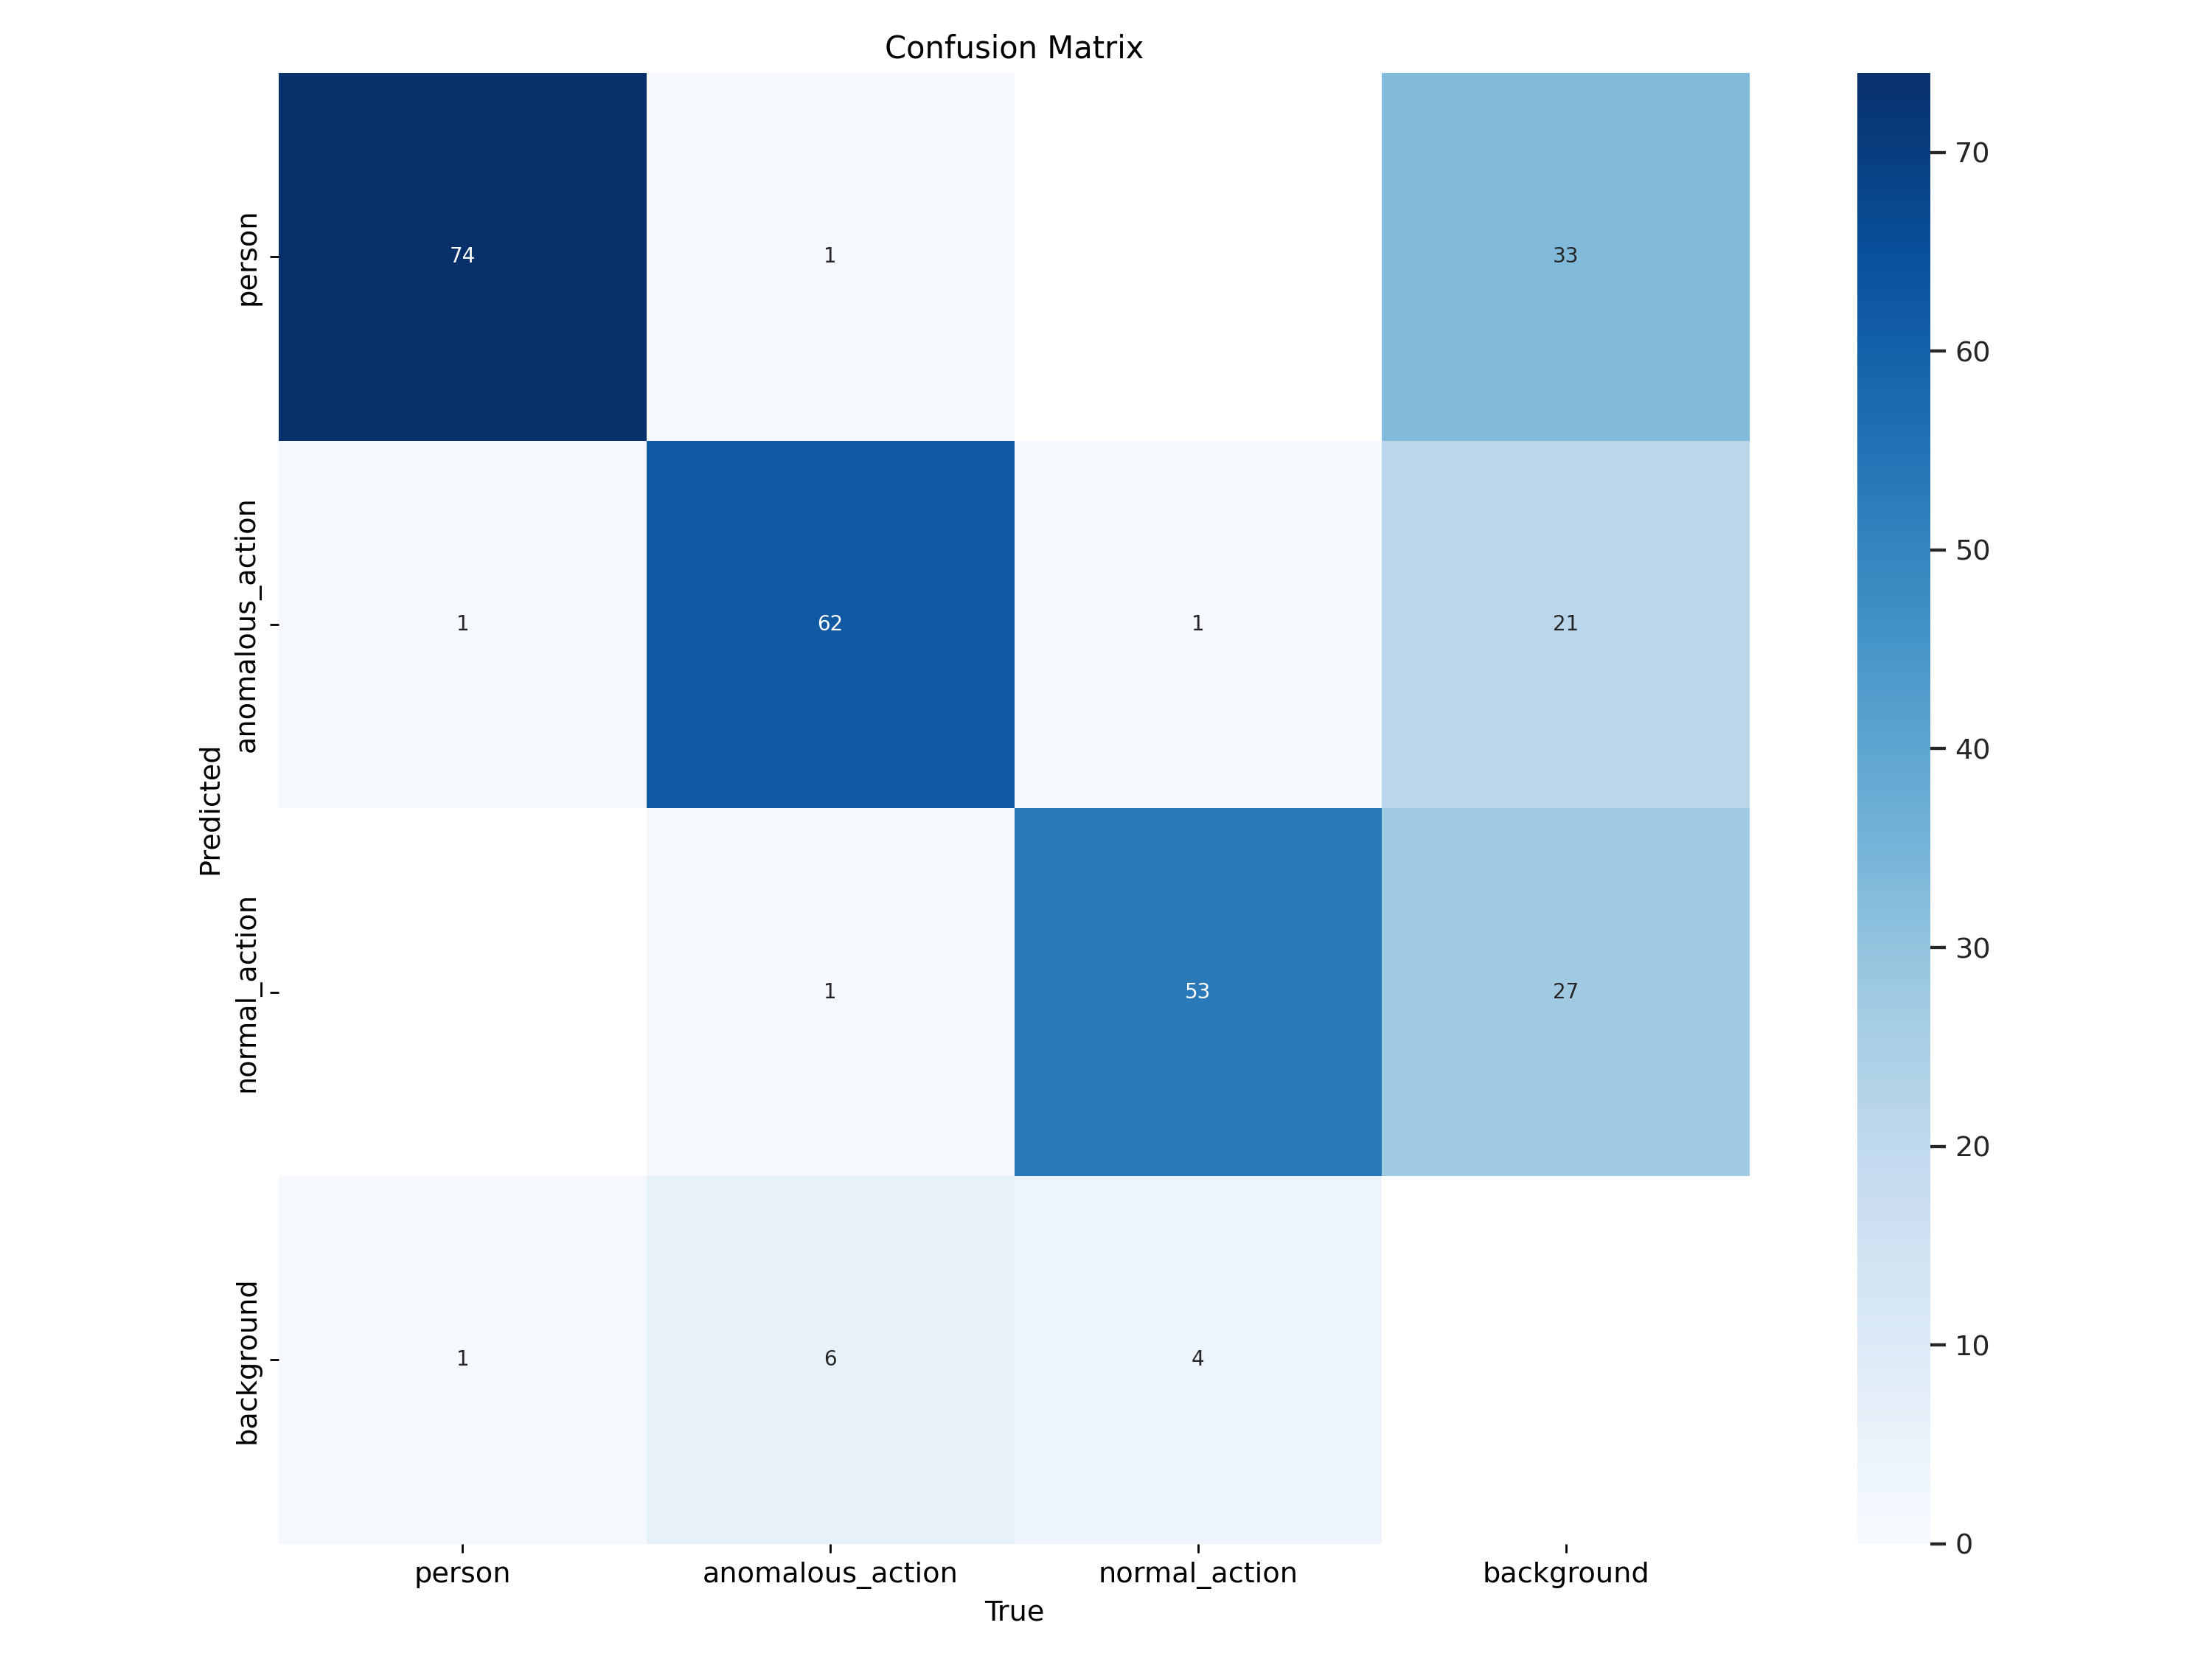

In [6]:
from IPython.display import display, Image

Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=1000)

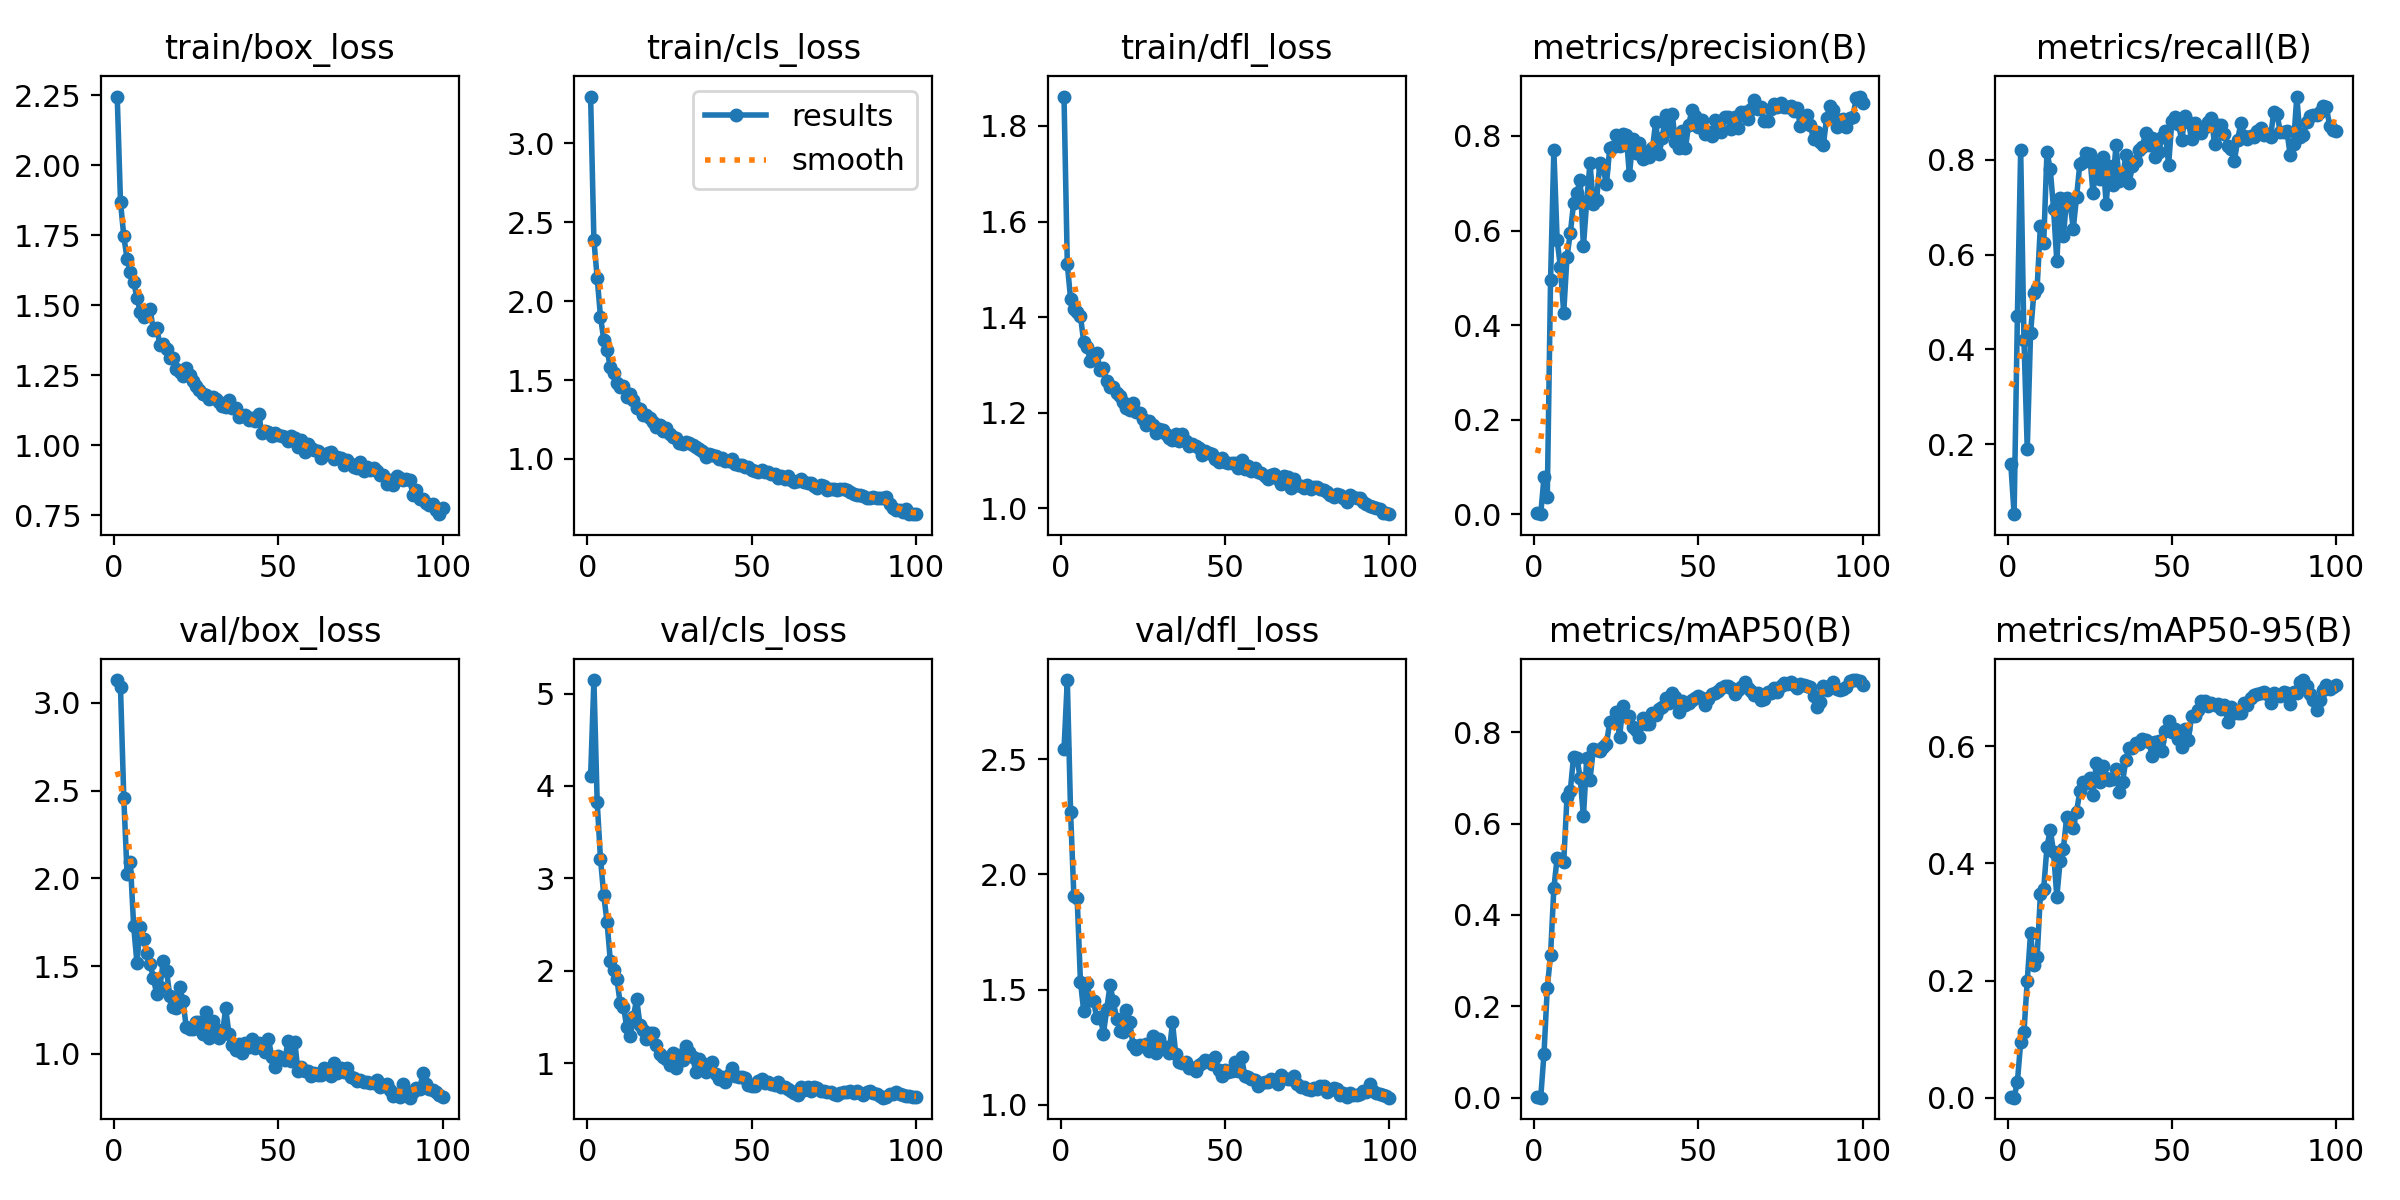

In [7]:
Image(filename=f'/content/runs/detect/train/results.png', width=1000)

# Testing the trained model

In [ ]:
predicted_results = model.predict(source='/content/sample_data/istockphoto-496788196-640_adpp_is_mp4-0010_jpg.rf.64a7c9ccb1b4c183aecfa8a4e69ec295.jpg', save=True)


image 1/1 /content/sample_data/istockphoto-496788196-640_adpp_is_mp4-0010_jpg.rf.64a7c9ccb1b4c183aecfa8a4e69ec295.jpg: 640x640 1 person, 13.0ms
Speed: 2.6ms preprocess, 13.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train6
